In [1]:
import openmc
import matplotlib.pyplot as plt

In [3]:
# materials
zirconium = openmc.Material()
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.5)

uo2 = openmc.Material()
uo2.add_element('U', 1.0, enrichment=3.5)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cc', 10.0)

water = openmc.Material()
water.add_element('H', 2.0)
water.add_element('O', 1.0)
water.set_density('g/cc', 1.0)

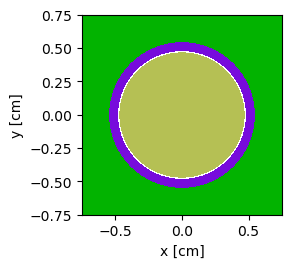

In [19]:
# typical pincell
fuel_or = openmc.ZCylinder(r=0.46955)
clad_ir = openmc.ZCylinder(r=0.47910)
clad_or = openmc.ZCylinder(r=0.54640)

fuel_pin = openmc.Cell(fill=uo2, region=-fuel_or)
clad_pin = openmc.Cell(fill=zirconium, region= +clad_ir & -clad_or)
water_pin = openmc.Cell(fill=water, region = +clad_or)

pin_univ = openmc.Universe(cells=[fuel_pin, clad_pin, water_pin])
pin_univ.plot(width=(1.5,1.5))
plt.savefig('/home/joe/Pictures/polygon_tally/pin_cell.png')

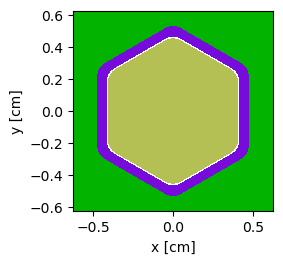

In [20]:
# hexagonal fuel
hex_fuel_or = openmc.model.HexagonalPrism(edge_length=0.46955, corner_radius=.1)
hex_clad_ir = openmc.model.HexagonalPrism(edge_length=0.47910, corner_radius=.1)
hex_clad_or = openmc.model.HexagonalPrism(edge_length=0.54640, corner_radius=.1)

hex_fuel = openmc.Cell(fill=uo2, region=-hex_fuel_or)
hex_clad = openmc.Cell(fill=zirconium, region= +hex_clad_ir & -hex_clad_or)
hex_water = openmc.Cell(fill=water, region= +hex_clad_or)

hex_univ = openmc.Universe(cells=[hex_fuel, hex_clad, hex_water])
hex_univ.plot(width=(1.25,1.25))
plt.savefig('/home/joe/Pictures/polygon_tally/hex_cell.png')